C:\Users\user\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


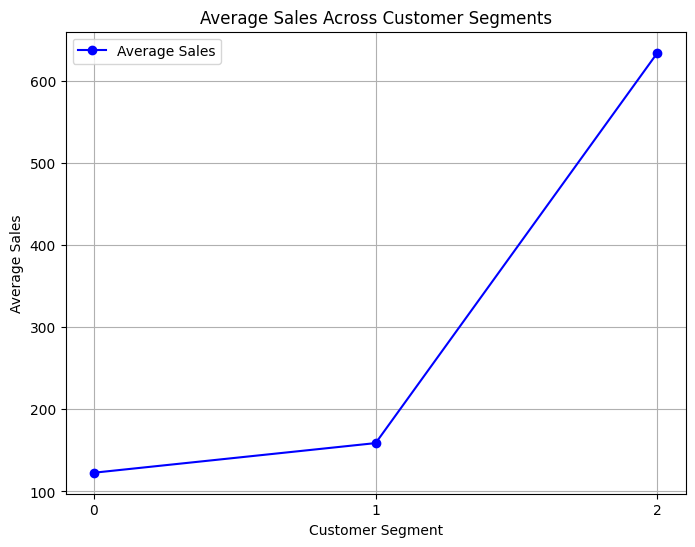

[0 1 2]


In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data from the CSV file
df = pd.read_csv('superstore_sales.csv')

# Select relevant features for segmentation
features = df[['Sales', 'Quantity', 'Discount', 'Profit']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform K-means clustering (for example, with 3 clusters)
num_clusters = 3
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['CustomerSegment'] = kmeans.fit_predict(scaled_features)

# Analyze the segments
segment_analysis = df.groupby('CustomerSegment').agg({
    'Sales': 'mean',
    'Quantity': 'mean',
    'Discount': 'mean',
    'Profit': 'mean',
    'Customer ID': 'count'
}).reset_index()

# Line chart for average sales across customer segments
plt.figure(figsize=(8, 6))
plt.plot(segment_analysis['CustomerSegment'], segment_analysis['Sales'], marker='o', color='b', label='Average Sales')
plt.xlabel('Customer Segment')
plt.ylabel('Average Sales')
plt.title('Average Sales Across Customer Segments')
plt.xticks(segment_analysis['CustomerSegment'])
plt.legend()
plt.grid(True)
plt.show()
# Print unique customer segments
print(df['CustomerSegment'].unique())



Customer Segmentation:

Segment customers for targeted marketing strategies

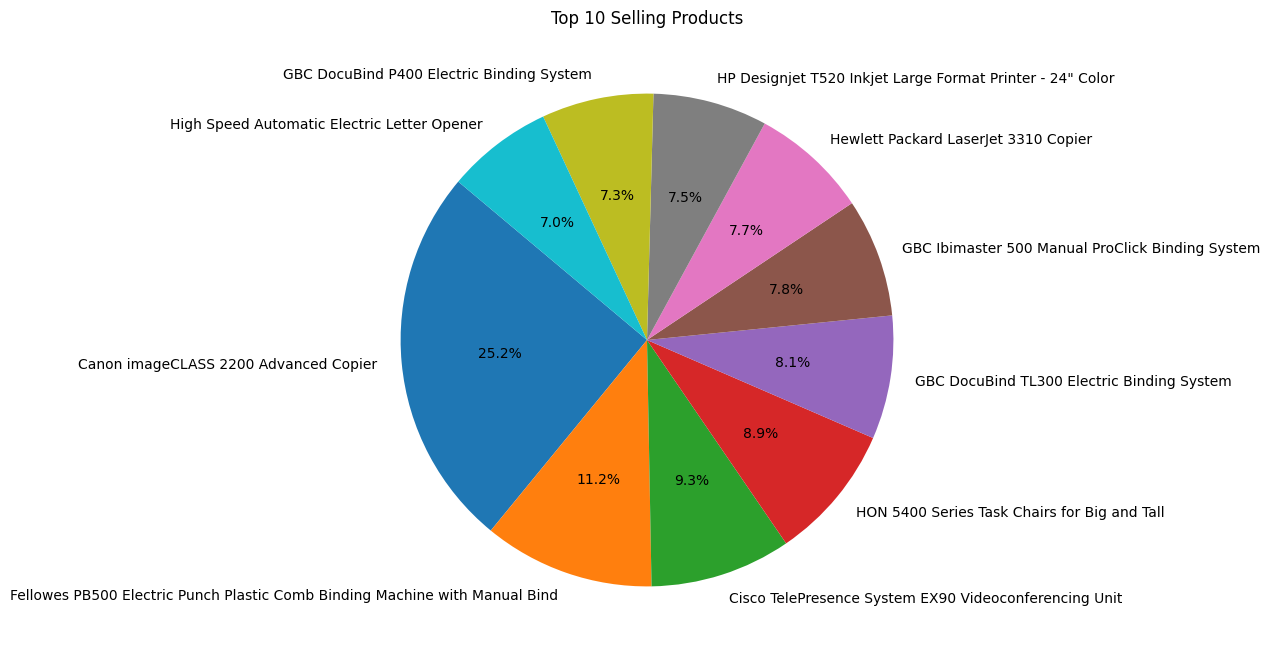

In [2]:


# Calculate total sales for each product
top_products = df.groupby('Product Name')['Sales'].sum().reset_index()

# Sort products by total sales in descending order
top_products = top_products.sort_values(by='Sales', ascending=False).head(10)  # Select top 10 products

# Create a pie chart for the top-selling products
plt.figure(figsize=(8, 8))
plt.pie(top_products['Sales'], labels=top_products['Product Name'], autopct='%1.1f%%', startangle=140)
plt.title('Top 10 Selling Products')
plt.show()

Product Performance Analysis:

Identify top-selling products for focused promotions.

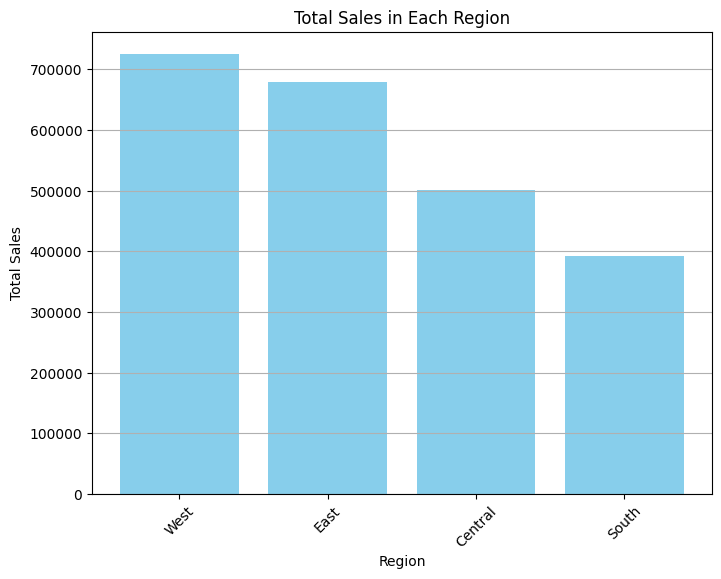

In [3]:


# Calculate total sales for each region
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

# Sort regions by total sales in descending order
region_sales = region_sales.sort_values(by='Sales', ascending=False)

# Create a bar chart for region-wise sales
plt.figure(figsize=(8, 6))
plt.bar(region_sales['Region'], region_sales['Sales'], color='skyblue')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Total Sales in Each Region')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


Regional Sales Focus:

Allocate marketing budget based on high-performing regions.

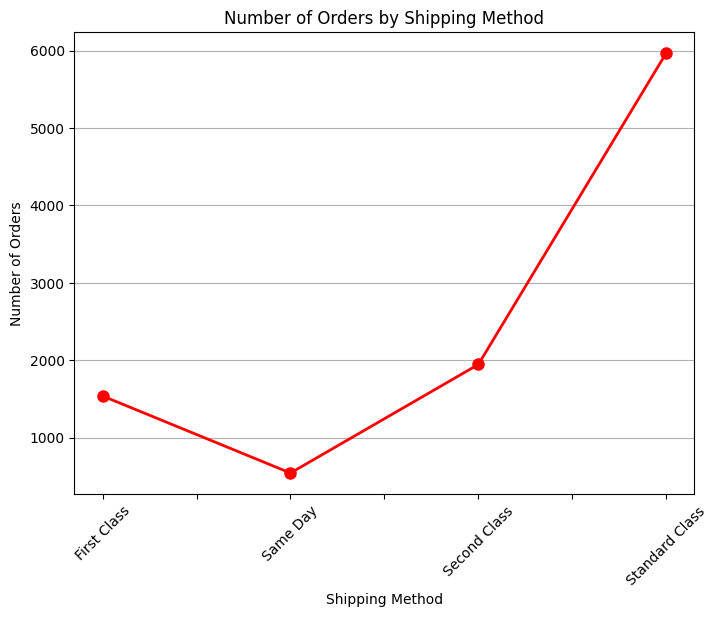

In [5]:


# Count the occurrences of each shipping method
shipping_counts = df['Ship Mode'].value_counts()

# Create a line chart for shipping methods with red lines
plt.figure(figsize=(8, 6))
shipping_counts.sort_index().plot(kind='line', color='red', marker='o', linewidth=2, markersize=8)
plt.xlabel('Shipping Method')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Shipping Method')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()
